# EDA - companies

### 📥 importing the modules
This section import the modules and paths used for running the notebook

In [1]:
import importlib
# importing path modules
import sys
from pathlib import Path
ROOT = Path.cwd().parent
print(str(ROOT))
sys.path.append(str(ROOT))

# importing utils
from src import utils
importlib.reload(utils)
from src.utils import load_data

# importing cleaning
from src import cleaning
importlib.reload(cleaning)
from src.cleaning import clean_data

# importing views
from src import views
importlib.reload(views)
from src.views import view_sim_distribution, remove_punctuation



d:\IT\somer\veridion_project


### 📥 Data Loading
This section loads the Telco dataset using the custom `load_data()` function.

In [2]:
df_companies= load_data("ml_insurance_challenge")

### 📊 Initial Data Overview
Basic structure, missing values, and data types.

In [3]:
df_companies.describe(include="all")

,description,business_tags,sector,category,niche
count,9482,9494,9467,9467,9494
unique,9477,9062,7,450,957
top,The company is a business analysis and English...,[],Manufacturing,Farms & Agriculture Production,Apiculture
freq,3,363,4005,237,10


In [4]:
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9494 entries, 0 to 9493
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   description    9482 non-null   object
 1   business_tags  9494 non-null   object
 2   sector         9467 non-null   object
 3   category       9467 non-null   object
 4   niche          9494 non-null   object
dtypes: object(5)
memory usage: 371.0+ KB


In [5]:
# See duplicate values
duplicates = df_companies[df_companies.duplicated(keep=False)]
print(duplicates)

                                            description  \
2784  Mahkota Genteng is a company that specializes ...   
4406  PP Electronics (China) Official Website is a C...   
5770  Mahkota Genteng is a company that specializes ...   
8163  PP Electronics (China) Official Website is a C...   

                                          business_tags         sector  \
2784  ['Concrete Pits Manufacturer', 'Full-acrylic W...  Manufacturing   
4406                                                 []  Manufacturing   
5770  ['Concrete Pits Manufacturer', 'Full-acrylic W...  Manufacturing   
8163                                                 []  Manufacturing   

                         category                                     niche  
2784  Ready Mix Concrete Supplier      Other Concrete Product Manufacturing  
4406            Plastics Products  All Other Plastics Product Manufacturing  
5770  Ready Mix Concrete Supplier      Other Concrete Product Manufacturing  
8163            Plast

In [6]:
# Eliminate duplicates
df_no_dupes = df_companies.drop_duplicates()

In [7]:
# See duplicate description
duplicate_descr = df_no_dupes[df_no_dupes["description"].duplicated(keep=False)]
print(duplicate_descr)

                                            description  \
706   The company is a business analysis and English...   
884   MVH Containerparts is a leading supplier of co...   
1032                                                NaN   
2137                                                NaN   
2640  The company is a business analysis and English...   
4017                                                NaN   
4399                                                NaN   
4931  MVH Containerparts is a leading supplier of co...   
5660                                                NaN   
6098                                                NaN   
6285                                                NaN   
6510                                                NaN   
7920                                                NaN   
8058                                                NaN   
8872                                                NaN   
9043                                                NaN 

In [8]:
na_descr = df_no_dupes[df_no_dupes["description"].isna()]
print(na_descr)

     description                                      business_tags  \
1032         NaN  ['Community Engagement Services', 'Crime Preve...   
2137         NaN  ['Whatsapp Messaging Service', 'Android and Ip...   
4017         NaN  ['High Level of Customer Satisfaction', 'Wood ...   
4399         NaN  ['Distribution of First-need Items', 'Social M...   
5660         NaN  ['Lottery Ticket Sales', 'Lotteries and Promot...   
6098         NaN                                                 []   
6285         NaN  ['Journalism Services', 'Magicians, Columnists...   
6510         NaN  ['Customized Transferees for Community and Org...   
7920         NaN  ['Business Directory Services', 'Business Aler...   
8058         NaN  ['3D Rendering Services', 'Structural Detailin...   
8872         NaN  ['Business Legal Services', 'Legal Assistance ...   
9043         NaN  ['Training & Coaching', 'Mountain Climbing Coa...   

             sector                             category  \
1032     Governm

In [9]:
print(df_no_dupes.isna().sum())

description      12
business_tags     0
sector           27
category         27
niche             0
dtype: int64


### 📊 Taxonomy Overview
Basic structure, missing values, and data types.

In [10]:
df_taxonomy= load_data("insurance_taxonomy")

In [11]:
df_taxonomy.describe()

,label
count,220
unique,220
top,Agricultural Equipment Services
freq,1


In [12]:
df_taxonomy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   220 non-null    object
dtypes: object(1)
memory usage: 1.8+ KB


### 🧹 Data Cleaning
Remove punctuation, lower all characters. Prepare for vectorization

d:\IT\somer\veridion_project\src\cleaning.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].astype(str).str.lower()
d:\IT\somer\veridion_project\src\cleaning.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].apply(remove_punctuation)
d:\IT\somer\veridion_project\src\cleaning.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

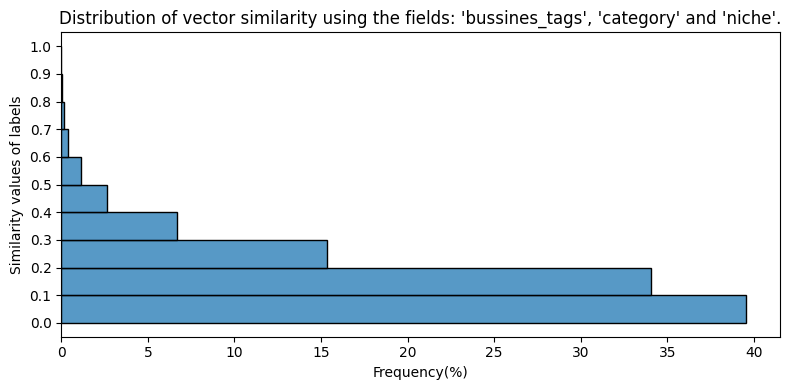

In [ ]:
# similarity values between companies('bussines_tags', 'category' and 'niche') and taxonomy - The best values
import pandas as pd
df_similarity = pd.read_csv("../similarity_values.csv")
view_sim_distribution(df_similarity, " using the fields: 'bussines_tags', 'category' and 'niche'.", ROOT, col_nr=1)

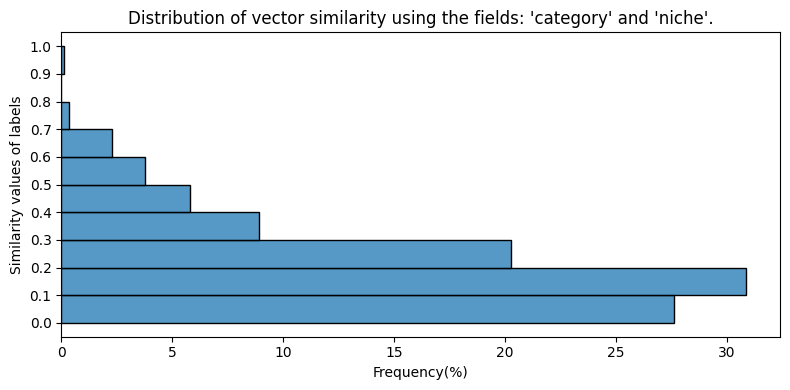

In [15]:
# similarity values between companies('bussines_tags', 'category' and 'niche') and taxonomy - The best values
df_similarity_2 = pd.read_csv("../similarity_values_category_niche.csv")
view_sim_distribution(df_similarity_2, " using the fields: 'category' and 'niche'.", ROOT, col_nr=1)

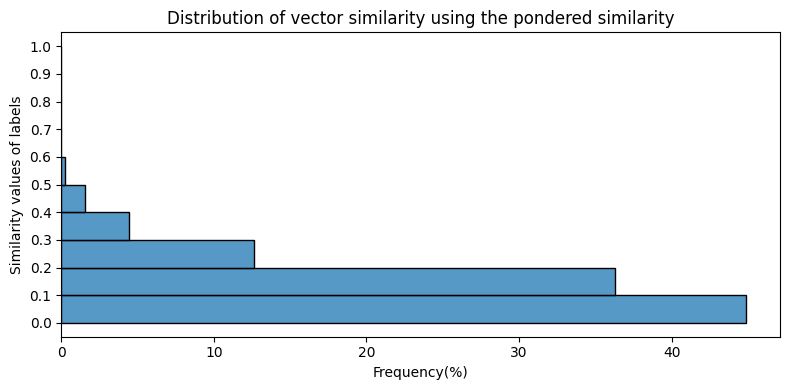

In [17]:
# similarity values between companies and taxonomy - The best values using a pondered similarity 
# the taxonomy is split
df_similarity_pondered = pd.read_csv("../pondered_similarity.csv")
view_sim_distribution(df_similarity_pondered, " using the pondered similarity", ROOT, col_nr=1)


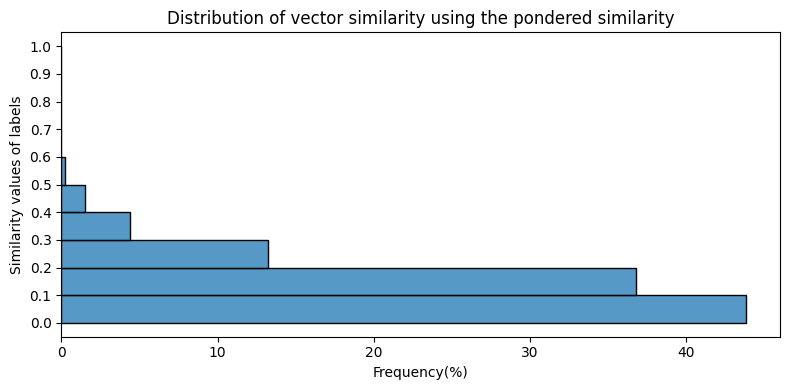

In [18]:
# Adding sector
df_similarity_pondered_1 = pd.read_csv("../pondered_similarity_sect.csv")
view_sim_distribution(df_similarity_pondered_1, " using the pondered similarity", ROOT, col_nr=1)

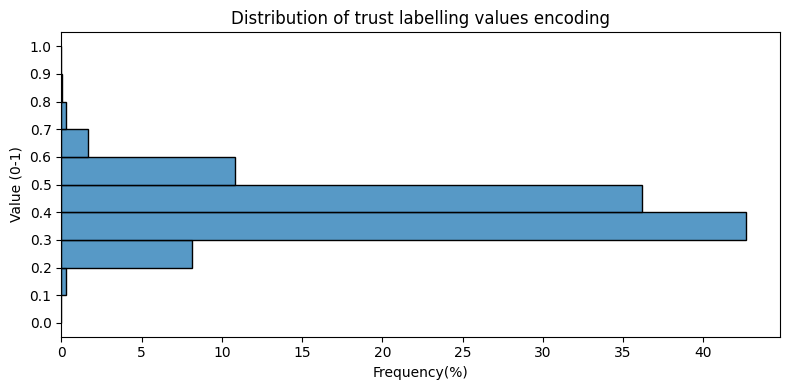

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
df_encoded = pd.read_csv("../companies_lab_encoding.csv")

plt.figure(figsize=(8, 4), dpi=100)
sns.histplot(y=df_encoded["sim_val_1"].astype(float), bins=np.linspace(0.0, 1.0, 11), stat="percent")
title = "Distribution of trust labelling values encoding"
plt.title(title)
plt.ylabel("Value (0-1)")
plt.xlabel("Frequency(%)")
plt.yticks(np.arange(0, 1.1, 0.1))
plt.tight_layout()
plt.savefig(str(ROOT) + f"/plots/{"_".join(title.strip().split())}.png")
plt.show()
    

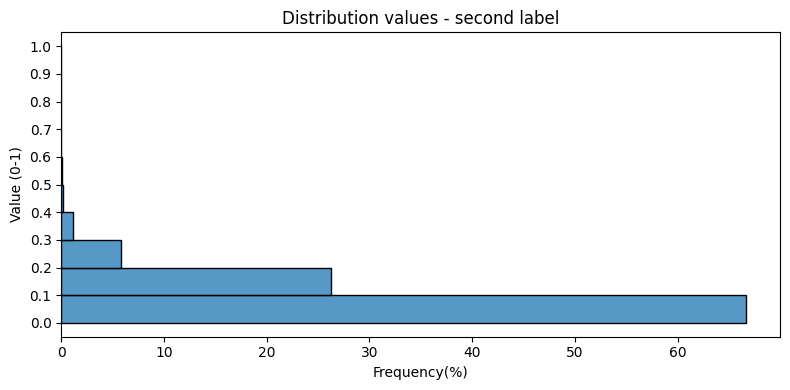

In [5]:
plt.figure(figsize=(8, 4), dpi=100)
sns.histplot(y=df_encoded["sim_val_2"].astype(float), bins=np.linspace(0.0, 1.0, 11), stat="percent")
title = "Distribution values - second label"
plt.title(title)
plt.ylabel("Value (0-1)")
plt.xlabel("Frequency(%)")
plt.yticks(np.arange(0, 1.1, 0.1))
plt.tight_layout()
plt.savefig(str(ROOT) + f"/plots/{"_".join(title.strip().split())}.png")
plt.show()

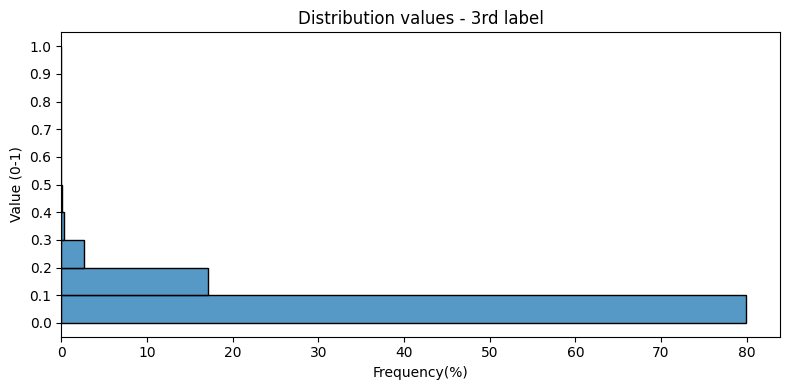

In [6]:
plt.figure(figsize=(8, 4), dpi=100)
sns.histplot(y=df_encoded["sim_val_3"].astype(float), bins=np.linspace(0.0, 1.0, 11), stat="percent")
title = "Distribution values - 3rd label"
plt.title(title)
plt.ylabel("Value (0-1)")
plt.xlabel("Frequency(%)")
plt.yticks(np.arange(0, 1.1, 0.1))
plt.tight_layout()
plt.savefig(str(ROOT) + f"/plots/{"_".join(title.strip().split())}.png")
plt.show()

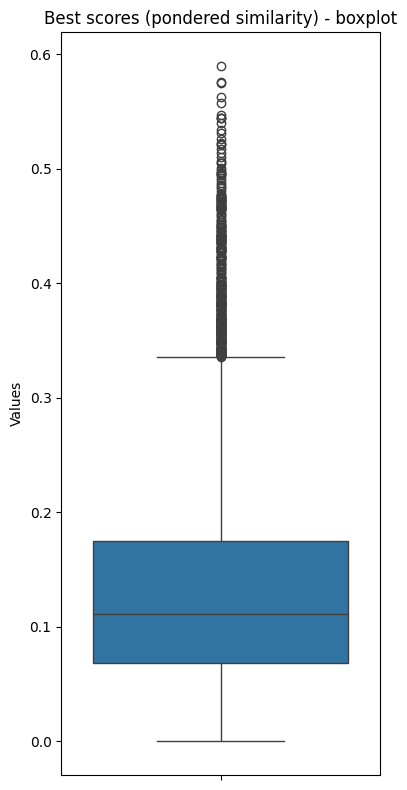

In [19]:
# see the distribution of the values in a boxplot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4, 8))
sns.boxplot(data = df_similarity_pondered_1.iloc[:, 1])
plt.title("Best scores (pondered similarity) - boxplot")
plt.ylabel("Values")
plt.tight_layout()
plt.savefig(str(ROOT) + "/plots/boxplot_similarity_scores_pondered.png")
plt.show()


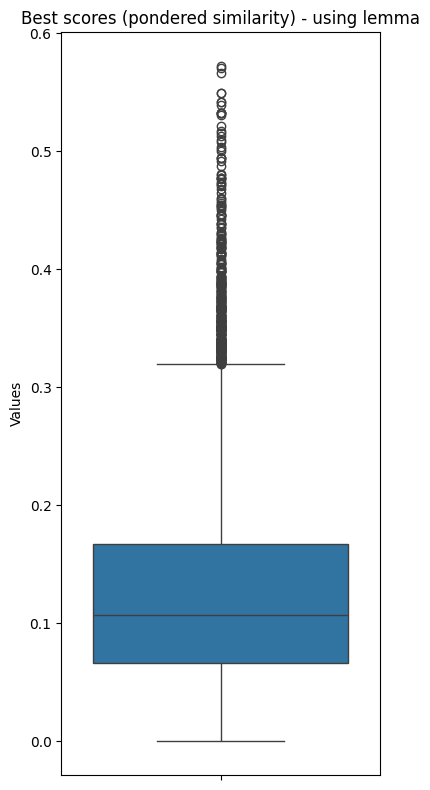

In [20]:
# see the distribution of the values in a boxplot - after lemmatization
df_similarity_lemma = pd.read_csv("../companies_pred_lab_1.csv")
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4, 8))
sns.boxplot(data = df_similarity_lemma["values"])
plt.title("Best scores (pondered similarity) - using lemma")
plt.ylabel("Values")
plt.tight_layout()
plt.savefig(str(ROOT) + "/plots/boxplot_similarity_scores_lemma.png")
plt.show()

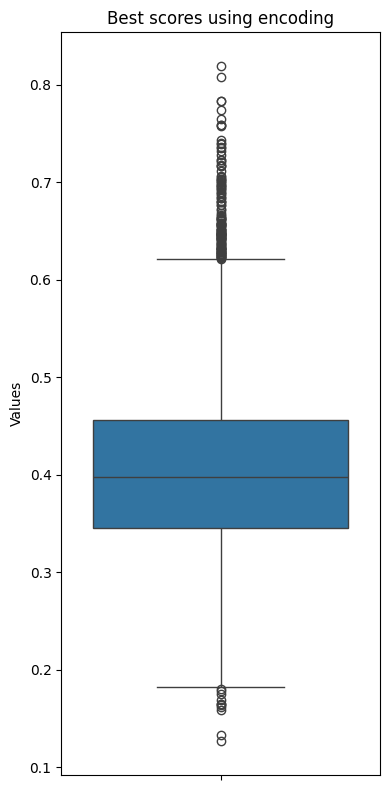

In [7]:
# see the distribution of the values in a boxplot - after lemmatization
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4, 8))
sns.boxplot(data = df_encoded["sim_val_1"])
plt.title("Best scores using encoding")
plt.ylabel("Values")
plt.tight_layout()
plt.savefig(str(ROOT) + "/plots/encoding_best_scores.png")
plt.show()

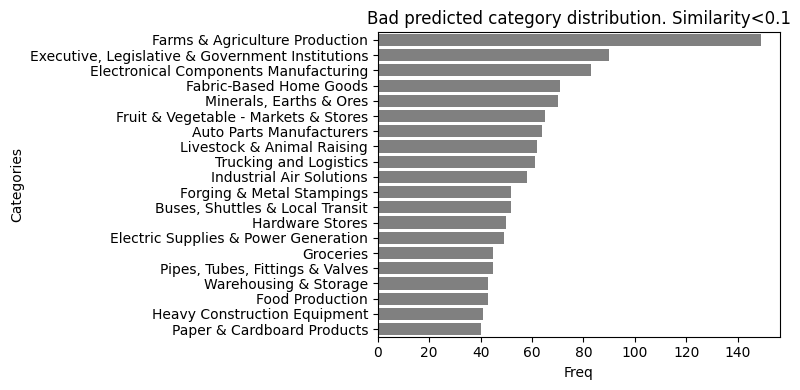

In [21]:
# See the distribution of the categories predicted with least scores
df_pred_lab_1 = pd.read_csv("../companies_pred_lab_1.csv")
categories_bad_predicted = df_pred_lab_1.loc[df_pred_lab_1["values"]<=0.1, "category"].value_counts().head(20)
plt.figure(figsize=(8, 4))
sns.barplot(x = categories_bad_predicted.values, y=categories_bad_predicted.index, color="gray")
plt.title("Bad predicted category distribution. Similarity<0.1")
plt.ylabel("Categories")
plt.xlabel("Freq")
plt.tight_layout()
plt.savefig(str(ROOT) + "/plots/categories_bad_predicted.png")
plt.show()

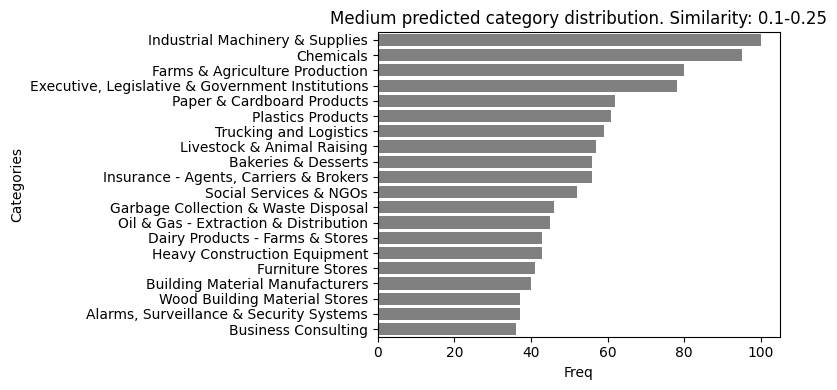

In [22]:
# See the distribution of the categories predicted with medium scores 0.1-0.25
categories_medium_predicted = df_pred_lab_1.loc[(df_pred_lab_1["values"]>0.1) & (df_pred_lab_1["values"]<0.25), "category"].value_counts().head(20)
plt.figure(figsize=(8, 4))
sns.barplot(x = categories_medium_predicted.values, y=categories_medium_predicted.index, color="gray")
plt.title("Medium predicted category distribution. Similarity: 0.1-0.25")
plt.ylabel("Categories")
plt.xlabel("Freq")
plt.tight_layout()
plt.savefig(str(ROOT) + "/plots/categories_medium_predicted.png")
plt.show()

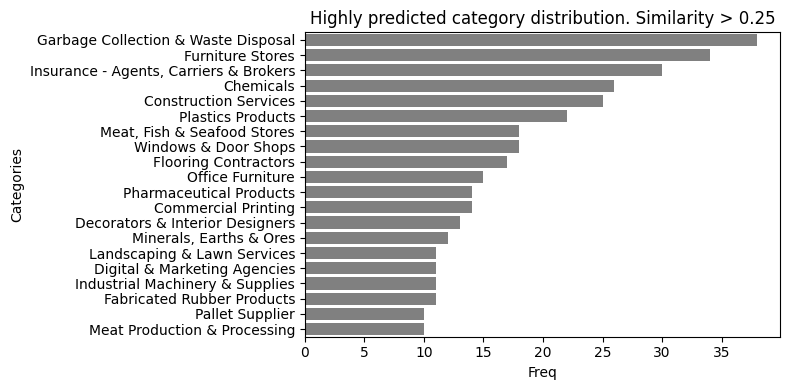

In [23]:
# See the distribution of the categories predicted with high scores >0.25
categories_highly_predicted = df_pred_lab_1.loc[df_pred_lab_1["values"]>0.25, "category"].value_counts().head(20)
plt.figure(figsize=(8, 4))
sns.barplot(x = categories_highly_predicted.values, y=categories_highly_predicted.index, color="gray")
plt.title("Highly predicted category distribution. Similarity > 0.25")
plt.ylabel("Categories")
plt.xlabel("Freq")
plt.tight_layout()
plt.savefig(str(ROOT) + "/plots/categories_well_predicted.png")
plt.show()

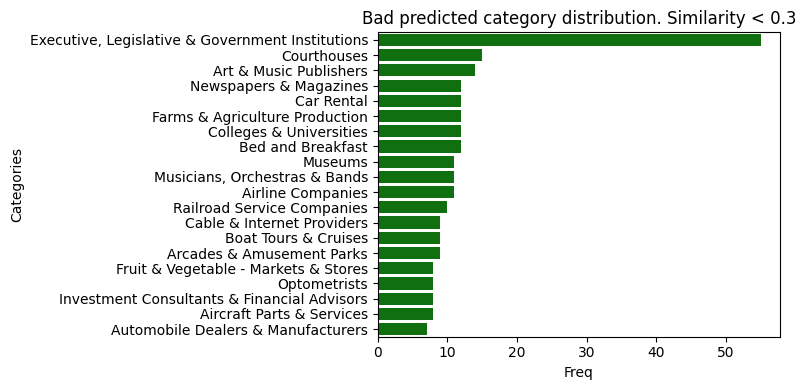

In [8]:
# See the distribution of the categories predicted with least scores - encoding
categories_bad_predicted = df_encoded.loc[df_encoded["sim_val_1"]<=0.3, "category"].value_counts().head(20)
plt.figure(figsize=(8, 4))
sns.barplot(x = categories_bad_predicted.values, y=categories_bad_predicted.index, color="green")
plt.title("Bad predicted category distribution. Similarity < 0.3")
plt.ylabel("Categories")
plt.xlabel("Freq")
plt.tight_layout()
plt.savefig(str(ROOT) + "/plots/categories_bad_predicted_enc.png")
plt.show()

In [ ]:
# See the distribution of the categories best predicted - encoding
categories_best_predicted = df_encoded.loc[df_encoded["sim_val_1"]>0.4, "category"].value_counts().head(20)
plt.figure(figsize=(8, 4))
sns.barplot(x = categories_best_predicted.values, y=categories_best_predicted.index, color="green")
plt.title("Best predicted category distribution. Similarity > 0.4")
plt.ylabel("Categories")
plt.xlabel("Freq")
plt.tight_layout()
plt.savefig(str(ROOT) + "/plots/categories_best_predicted_enc.png")
plt.show()